In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [191]:
df = pd.read_csv('medical_conditions_dataset.csv')
df.head()

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic


In [113]:
df.shape

(10000, 9)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   full_name       10000 non-null  object 
 2   age             5445 non-null   float64
 3   gender          10000 non-null  object 
 4   smoking_status  10000 non-null  object 
 5   bmi             4652 non-null   float64
 6   blood_pressure  3766 non-null   float64
 7   glucose_levels  4756 non-null   float64
 8   condition       10000 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 703.2+ KB


In [115]:
df.isnull().sum()

,0
id,0
full_name,0
age,4555
gender,0
smoking_status,0
bmi,5348
blood_pressure,6234
glucose_levels,5244
condition,0


In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
age,5445.0,53.541598,20.925113,18.000000,35.000000,54.000000,72.000000,89.000000
bmi,4652.0,27.423420,7.231257,15.012119,21.077894,27.326204,33.689330,39.998687
blood_pressure,3766.0,135.209429,26.041531,90.009620,113.107754,134.821040,157.949509,179.999359
glucose_levels,4756.0,135.219608,37.607638,70.015961,102.273703,135.436764,168.349011,199.890429


In [117]:
df['condition'].value_counts()

,count
condition,
Diabetic,6013
Pneumonia,2527
Cancer,1460


## EDA

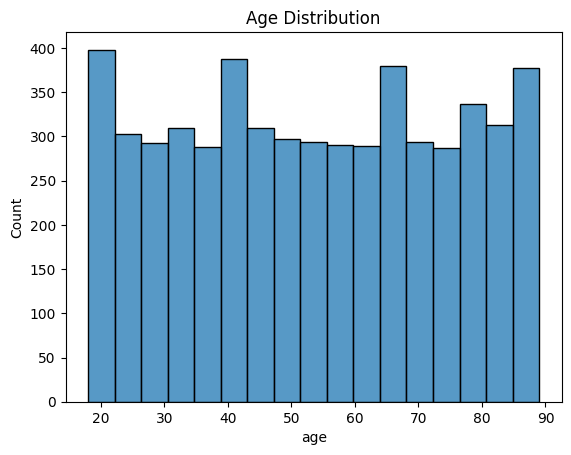

In [118]:
sns.histplot(df['age'].dropna())
plt.title('Age Distribution')
plt.show()

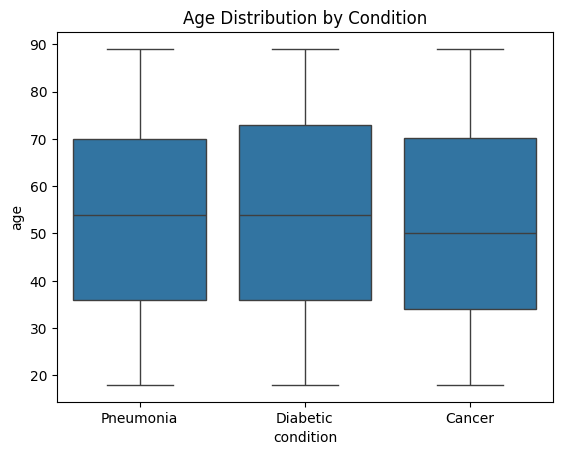

In [119]:
sns.boxplot(x='condition', y='age', data=df)
plt.title('Age Distribution by Condition')
plt.show()

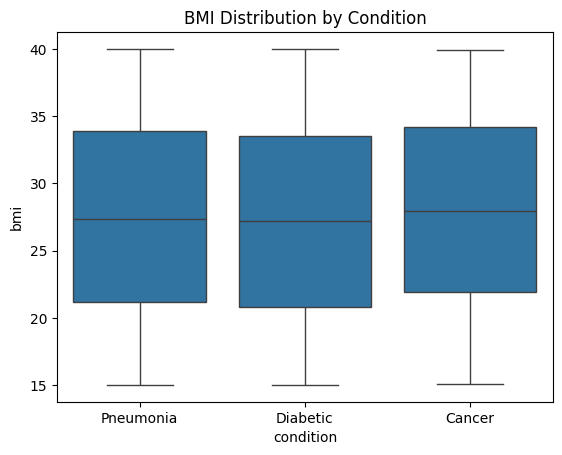

In [120]:
sns.boxplot(x='condition', y='bmi', data=df)
plt.title('BMI Distribution by Condition')
plt.show()

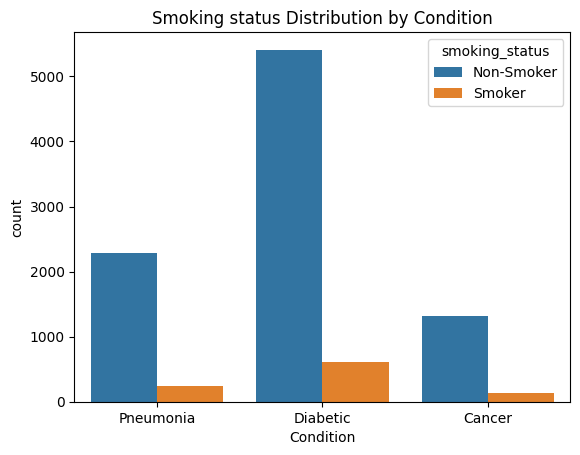

In [121]:
sns.countplot(x='condition', hue='smoking_status', data=df)
plt.title("Smoking status Distribution by Condition")
plt.xlabel('Condition')
plt.show()

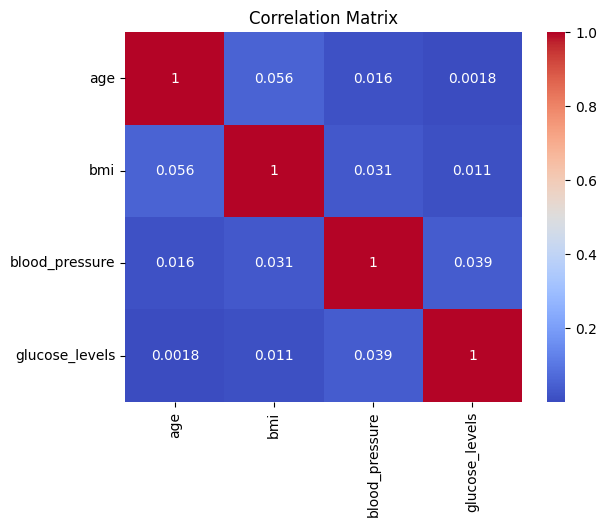

In [122]:
corr = df[['age', 'bmi', 'blood_pressure', 'glucose_levels']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Preprocessing

In [123]:
df['age'] = df['age'].fillna(df['age'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['blood_pressure'] = df['blood_pressure'].fillna(df['blood_pressure'].mean())
df['glucose_levels'] = df['glucose_levels'].fillna(df['glucose_levels'].mean())

In [124]:
df.head()

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,53.541598,male,Non-Smoker,27.423420,135.209429,135.219608,Pneumonia
1,2,User0002,30.000000,male,Non-Smoker,27.423420,105.315064,135.219608,Diabetic
2,3,User0003,18.000000,male,Non-Smoker,35.612486,135.209429,135.219608,Pneumonia
3,4,User0004,53.541598,male,Non-Smoker,27.423420,99.119829,135.219608,Pneumonia
4,5,User0005,76.000000,male,Non-Smoker,27.423420,135.209429,135.219608,Diabetic


In [125]:
df['smoking_status'].value_counts(), df['gender'].value_counts()

(smoking_status
 Non-Smoker    9014
 Smoker         986
 Name: count, dtype: int64,
 gender
 male      8506
 female    1494
 Name: count, dtype: int64)

In [126]:
encoder = OneHotEncoder(sparse_output=False)
encoded_df = encoder.fit_transform(df[['gender','smoking_status']])
encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out(['gender','smoking_status']))
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(['gender', 'smoking_status'], axis=1)

In [127]:
df.head()

,id,full_name,age,bmi,blood_pressure,glucose_levels,condition,gender_female,gender_male,smoking_status_Non-Smoker,smoking_status_Smoker
0,1,User0001,53.541598,27.423420,135.209429,135.219608,Pneumonia,0.0,1.0,1.0,0.0
1,2,User0002,30.000000,27.423420,105.315064,135.219608,Diabetic,0.0,1.0,1.0,0.0
2,3,User0003,18.000000,35.612486,135.209429,135.219608,Pneumonia,0.0,1.0,1.0,0.0
3,4,User0004,53.541598,27.423420,99.119829,135.219608,Pneumonia,0.0,1.0,1.0,0.0
4,5,User0005,76.000000,27.423420,135.209429,135.219608,Diabetic,0.0,1.0,1.0,0.0


In [128]:
df = df.drop(['gender_male', 'smoking_status_Smoker'], axis=1)
df = df.rename(columns={"gender_female": "Gender", "smoking_status_Non-Smoker": "Non-smoker"})
df.head()

,id,full_name,age,bmi,blood_pressure,glucose_levels,condition,Gender,Non-smoker
0,1,User0001,53.541598,27.423420,135.209429,135.219608,Pneumonia,0.0,1.0
1,2,User0002,30.000000,27.423420,105.315064,135.219608,Diabetic,0.0,1.0
2,3,User0003,18.000000,35.612486,135.209429,135.219608,Pneumonia,0.0,1.0
3,4,User0004,53.541598,27.423420,99.119829,135.219608,Pneumonia,0.0,1.0
4,5,User0005,76.000000,27.423420,135.209429,135.219608,Diabetic,0.0,1.0


In [129]:
df['condition'] = df['condition'].replace({'Pneumonia': 0, 'Diabetic': 1, 'Cancer': 2})
df.head()

,id,full_name,age,bmi,blood_pressure,glucose_levels,condition,Gender,Non-smoker
0,1,User0001,53.541598,27.423420,135.209429,135.219608,0,0.0,1.0
1,2,User0002,30.000000,27.423420,105.315064,135.219608,1,0.0,1.0
2,3,User0003,18.000000,35.612486,135.209429,135.219608,0,0.0,1.0
3,4,User0004,53.541598,27.423420,99.119829,135.219608,0,0.0,1.0
4,5,User0005,76.000000,27.423420,135.209429,135.219608,1,0.0,1.0


In [130]:
df = df.drop(['id', 'full_name'], axis=1)
df.head()

,age,bmi,blood_pressure,glucose_levels,condition,Gender,Non-smoker
0,53.541598,27.423420,135.209429,135.219608,0,0.0,1.0
1,30.000000,27.423420,105.315064,135.219608,1,0.0,1.0
2,18.000000,35.612486,135.209429,135.219608,0,0.0,1.0
3,53.541598,27.423420,99.119829,135.219608,0,0.0,1.0
4,76.000000,27.423420,135.209429,135.219608,1,0.0,1.0


In [131]:
X = df.drop(['condition'], axis=1)
y = df['condition']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.00000000e+00,  1.06045510e-01,  2.73440360e+00,
         5.21037031e-01,  2.38776354e+00,  3.33333333e-01],
       [ 0.00000000e+00,  8.33277624e-01, -6.04077403e-01,
         1.40339889e+00, -4.18801938e-01,  3.33333333e-01],
       [ 0.00000000e+00, -3.68628329e-03,  1.43402533e-03,
         1.18602058e-03, -4.18801938e-01,  3.33333333e-01],
       ...,
       [ 0.00000000e+00, -3.68628329e-03,  1.17936081e+00,
         1.18602058e-03, -4.18801938e-01,  3.33333333e-01],
       [ 0.00000000e+00, -7.89577808e-01,  1.43402533e-03,
        -1.03390572e+00, -4.18801938e-01,  3.33333333e-01],
       [ 0.00000000e+00, -8.71321745e-01,  1.43402533e-03,
        -8.11224399e-01,  2.38776354e+00,  3.33333333e-01]])

In [133]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9000, 6), (1000, 6), (9000,), (1000,))

In [134]:
X_train.head()

,age,bmi,blood_pressure,glucose_levels,Gender,Non-smoker
4896,53.541598,27.423420,167.169140,135.219608,1.0,1.0
4782,53.541598,16.429853,135.209429,135.219608,0.0,1.0
1496,53.541598,27.423420,135.209429,117.705728,0.0,1.0
1957,53.541598,27.423420,166.252832,159.554818,0.0,1.0
9171,53.541598,37.367964,135.209429,117.555787,0.0,1.0


## Model 1 : Naive Bayes

In [147]:
model_1 = GaussianNB()
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)
print("Classification report: \n",classification_report(y_test, y_pred_1))
print("---------------------------------------------------------------")
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_1))
print("---------------------------------------------------------------")
print("Accuracy Score: ", accuracy_score(y_test, y_pred_1))

Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       242
           1       0.61      1.00      0.76       609
           2       0.00      0.00      0.00       149

    accuracy                           0.61      1000
   macro avg       0.20      0.33      0.25      1000
weighted avg       0.37      0.61      0.46      1000

---------------------------------------------------------------
Confusion Matrix: 
 [[  0 242   0]
 [  0 609   0]
 [  0 149   0]]
---------------------------------------------------------------
Accuracy Score:  0.609


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 2: KNN

In [148]:
model_2 = KNeighborsClassifier()
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
print("Classification report: \n",classification_report(y_test, y_pred_2))
print("---------------------------------------------------------------")
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_2))
print("---------------------------------------------------------------")
print("Accuracy Score: ", accuracy_score(y_test, y_pred_2))

Classification report: 
               precision    recall  f1-score   support

           0       0.26      0.23      0.24       242
           1       0.62      0.78      0.69       609
           2       0.17      0.02      0.04       149

    accuracy                           0.54      1000
   macro avg       0.35      0.34      0.32      1000
weighted avg       0.47      0.54      0.49      1000

---------------------------------------------------------------
Confusion Matrix: 
 [[ 55 184   3]
 [120 477  12]
 [ 39 107   3]]
---------------------------------------------------------------
Accuracy Score:  0.535


## Model 3: Decision Tree

In [149]:
model_3 = DecisionTreeClassifier()
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
print("Classification report: \n",classification_report(y_test, y_pred_3))
print("---------------------------------------------------------------")
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_3))
print("---------------------------------------------------------------")
print("Accuracy Score: ", accuracy_score(y_test, y_pred_3))

Classification report: 
               precision    recall  f1-score   support

           0       0.22      0.23      0.23       242
           1       0.61      0.65      0.63       609
           2       0.17      0.13      0.15       149

    accuracy                           0.47      1000
   macro avg       0.34      0.34      0.33      1000
weighted avg       0.45      0.47      0.46      1000

---------------------------------------------------------------
Confusion Matrix: 
 [[ 55 156  31]
 [154 396  59]
 [ 36  94  19]]
---------------------------------------------------------------
Accuracy Score:  0.47


## Model 4: Random Forest

In [150]:
model_4 = RandomForestClassifier()
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)
print("Classification report: \n",classification_report(y_test, y_pred_4))
print("---------------------------------------------------------------")
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_4))
print("---------------------------------------------------------------")
print("Accuracy Score: ", accuracy_score(y_test, y_pred_4))

Classification report: 
               precision    recall  f1-score   support

           0       0.21      0.15      0.18       242
           1       0.60      0.75      0.67       609
           2       0.23      0.11      0.15       149

    accuracy                           0.51      1000
   macro avg       0.35      0.34      0.33      1000
weighted avg       0.45      0.51      0.47      1000

---------------------------------------------------------------
Confusion Matrix: 
 [[ 37 195  10]
 [111 454  44]
 [ 26 107  16]]
---------------------------------------------------------------
Accuracy Score:  0.507


## Model 5: XGBoost

In [152]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'merror',
    'eta': 0.1,
    'max_depth': 6
}
num_round = 10
model_5 = xgb.train(param, dtrain, num_round)
y_pred_5 = model_5.predict(dtest)
print("Classification report: \n",classification_report(y_test, y_pred_5))
print("---------------------------------------------------------------")
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_5))
print("---------------------------------------------------------------")
print("Accuracy Score: ", accuracy_score(y_test, y_pred_5))

Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       242
           1       0.61      1.00      0.76       609
           2       0.00      0.00      0.00       149

    accuracy                           0.61      1000
   macro avg       0.20      0.33      0.25      1000
weighted avg       0.37      0.61      0.46      1000

---------------------------------------------------------------
Confusion Matrix: 
 [[  0 242   0]
 [  1 607   1]
 [  0 149   0]]
---------------------------------------------------------------
Accuracy Score:  0.607


## Model 6: Neural Network

In [156]:
import tensorflow as tf

In [185]:
tf.random.set_seed(42)
inputs = tf.keras.Input(shape=(6,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model_6 = tf.keras.Model(inputs,outputs);
model_6.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])


In [189]:
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=3)
history_6 = model_6.fit(X_train,y_train_encoded,validation_split=0.1, epochs=10)

Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5902 - loss: 0.9425 - val_accuracy: 0.6000 - val_loss: 0.9391
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5902 - loss: 0.9426 - val_accuracy: 0.6000 - val_loss: 0.9388
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5902 - loss: 0.9432 - val_accuracy: 0.6000 - val_loss: 0.9404
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5902 - loss: 0.9424 - val_accuracy: 0.6000 - val_loss: 0.9403
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5902 - loss: 0.9423 - val_accuracy: 0.6000 - val_loss: 0.9403
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5902 - loss: 0.9423 - val_accuracy: 0.6000 - val_loss: 0.9403
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5902 - loss: 0.9423 - val_accuracy: 0.6000 - val_loss: 0.9403
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5902 - loss: 0.9423 - val_accuracy: 0.

In [190]:
model_6_pred_probs = model_6.predict(X_test)
y_pred_6 = tf.argmax(model_6_pred_probs, axis=1)
print("Classification report: \n",classification_report(y_test, y_pred_6))
print("---------------------------------------------------------------")
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_6))
print("---------------------------------------------------------------")
print("Accuracy Score: ", accuracy_score(y_test, y_pred_6))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       242
           1       0.61      1.00      0.76       609
           2       0.00      0.00      0.00       149

    accuracy                           0.61      1000
   macro avg       0.20      0.33      0.25      1000
weighted avg       0.37      0.61      0.46      1000

---------------------------------------------------------------
Confusion Matrix: 
 [[  0 242   0]
 [  0 609   0]
 [  0 149   0]]
---------------------------------------------------------------
Accuracy Score:  0.609


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
